In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [2]:
data = pd.read_csv('wine.csv')

In [3]:
print("--- Task 1: Exploratory Data Analysis (EDA) ---")
print("\n[1.1] Dataset Overview:")
print(data.head())
print("-" * 50)
print(data.info())
print("-" * 50)
print(f"Dataset Shape: {data.shape}")

--- Task 1: Exploratory Data Analysis (EDA) ---

[1.1] Dataset Overview:
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
--------------------------------------------------
<clas

In [4]:
X = data.drop('Type', axis=1)
y = data['Type']

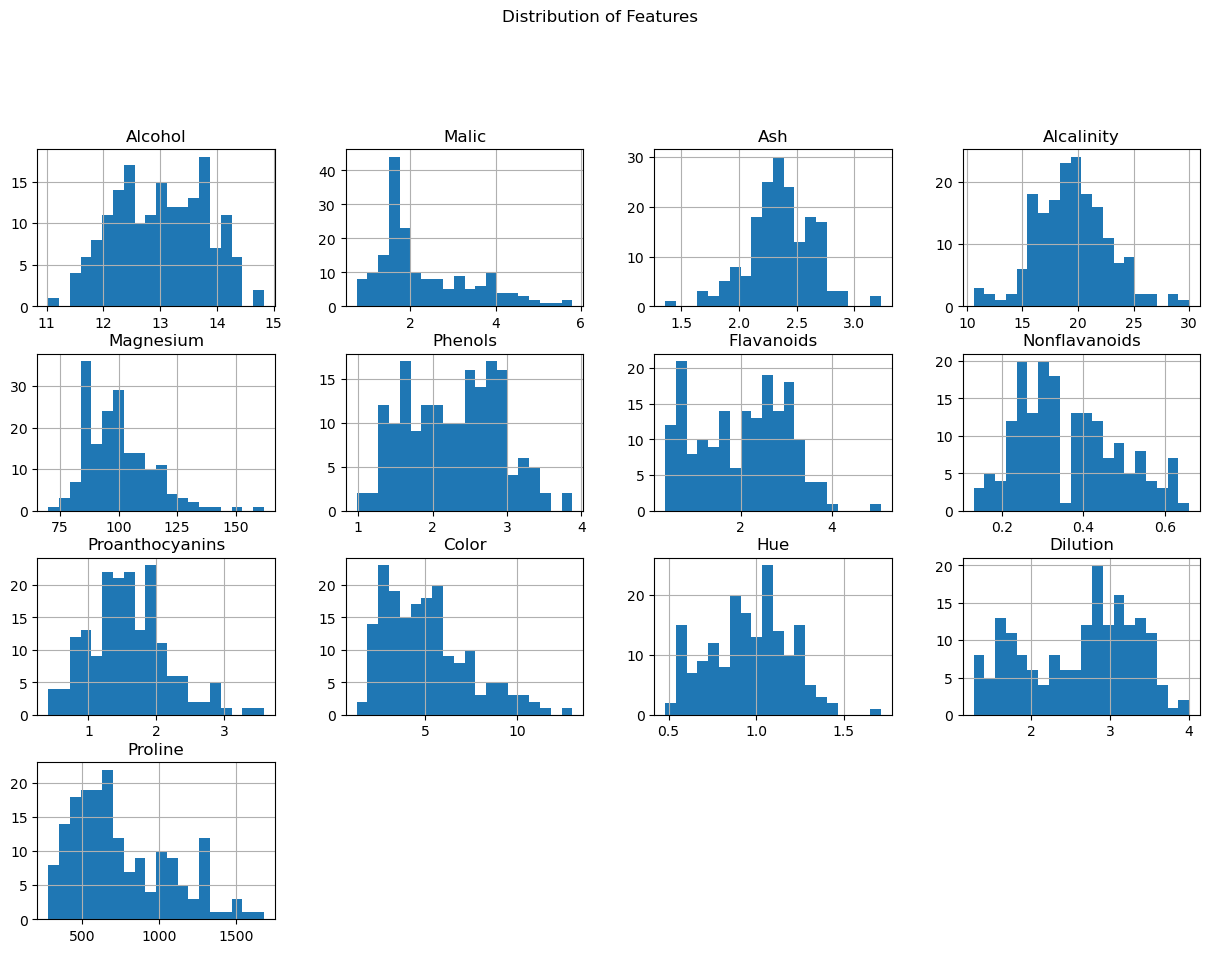

In [5]:
X.hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Features', y=1.02)
plt.show()


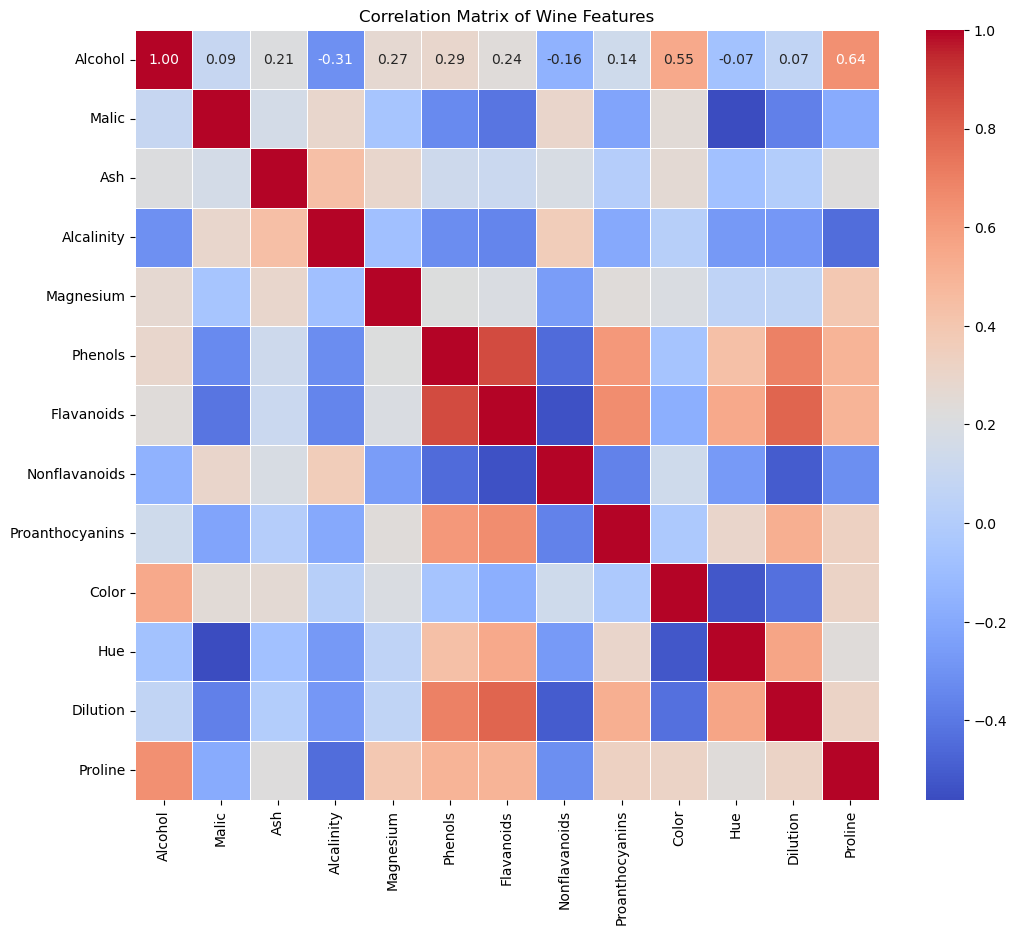


[1.3] Key EDA Insights:
 - Features like 'Flavanoids' and 'Phenols' show a very high positive correlation (0.86).
 - 'Color' and 'Alcohol' are moderately correlated.
 - 'Alcalinity' and 'Magnesium' appear to be less correlated with other features.
--------------------------------------------------


In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Wine Features')
plt.show()
print("\n[1.3] Key EDA Insights:")
print(" - Features like 'Flavanoids' and 'Phenols' show a very high positive correlation (0.86).")
print(" - 'Color' and 'Alcohol' are moderately correlated.")
print(" - 'Alcalinity' and 'Magnesium' appear to be less correlated with other features.")
print("-" * 50)

In [7]:
print("Task 2: Dimensionality Reduction with PCA ")

Task 2: Dimensionality Reduction with PCA 


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n[2.1] Features have been standardized (Mean=0, StdDev=1).")


[2.1] Features have been standardized (Mean=0, StdDev=1).


In [9]:
# Fit PCA on the standardized data
pca = PCA()
pca.fit(X_scaled)

# Calculate variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_features = range(1, len(cumulative_variance) + 1)

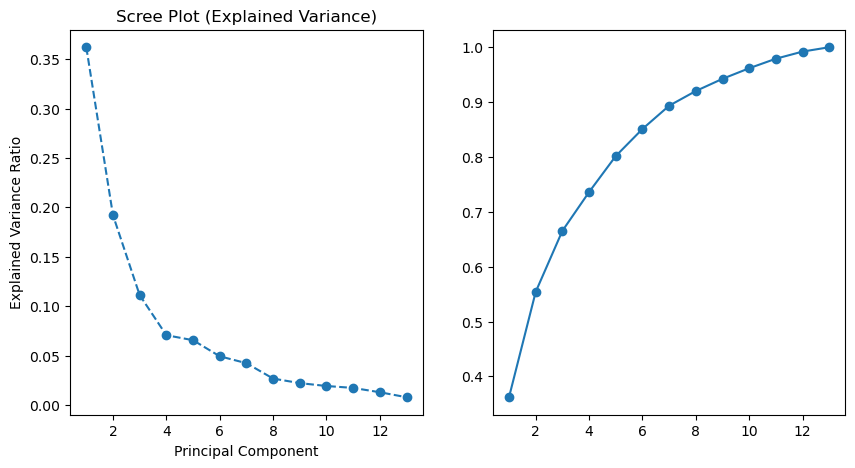

In [10]:
# Plot Scree Plot and Cumulative Variance
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(n_features, pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot (Explained Variance)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.subplot(1, 2, 2)
plt.plot(n_features, cumulative_variance, marker='o', linestyle='-')

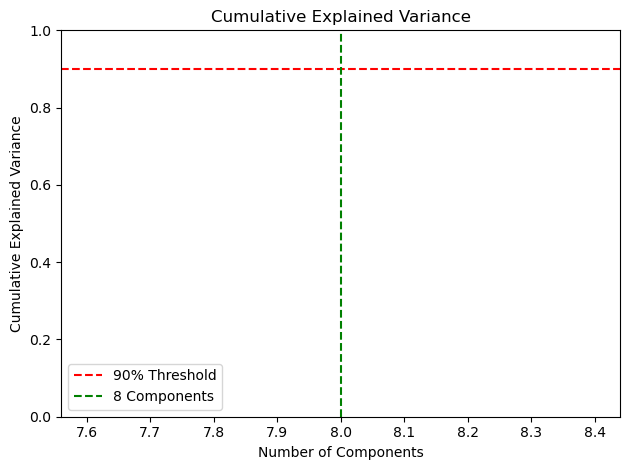

In [11]:
# Draw a line at 90% explained variance
optimal_components = np.argmax(cumulative_variance >= 0.90) + 1
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Threshold')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'{optimal_components} Components')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
print(f"\n[2.2] The first {optimal_components} principal components explain over 90% of the total variance.")
print(f"We will select 3 components for clustering to retain a high amount of information.")



[2.2] The first 8 principal components explain over 90% of the total variance.
We will select 3 components for clustering to retain a high amount of information.


In [13]:
N_COMPONENTS_CLUSTERING = 3
pca_final = PCA(n_components=N_COMPONENTS_CLUSTERING)
X_pca = pca_final.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(N_COMPONENTS_CLUSTERING)])

print(f"[2.3] PCA Transformation Complete. New dataset shape: {X_pca_df.shape}")
print("-" * 50)

[2.3] PCA Transformation Complete. New dataset shape: (178, 3)
--------------------------------------------------


In [14]:
print("--- Task 3: Clustering with Original Data (Scaled) ---")


--- Task 3: Clustering with Original Data (Scaled) ---


In [15]:
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

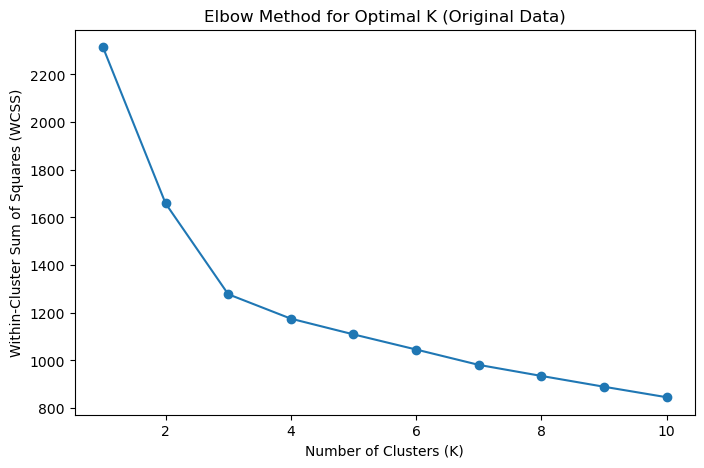

In [16]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K (Original Data)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [17]:
K_OPTIMAL = 3
kmeans_original = KMeans(n_clusters=K_OPTIMAL, random_state=42, n_init=10)
clusters_original = kmeans_original.fit_predict(X_scaled)

In [18]:
score_sil_orig = silhouette_score(X_scaled, clusters_original)
score_dbi_orig = davies_bouldin_score(X_scaled, clusters_original)

print(f"\n[3.2] Evaluation Metrics (Original Data, K={K_OPTIMAL}):")
print(f" - Silhouette Score: {score_sil_orig:.4f} (Higher is better)")
print(f" - Davies–Bouldin Index: {score_dbi_orig:.4f} (Lower is better)")


[3.2] Evaluation Metrics (Original Data, K=3):
 - Silhouette Score: 0.2849 (Higher is better)
 - Davies–Bouldin Index: 1.3892 (Lower is better)


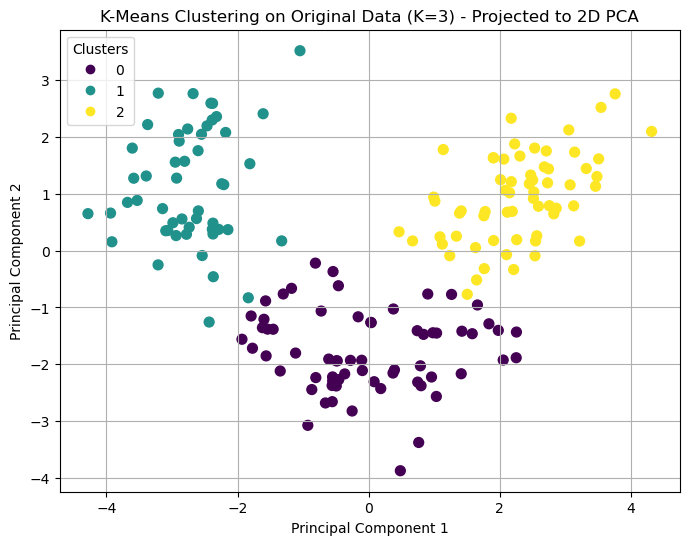

--------------------------------------------------


In [19]:
pca_2d_plot = PCA(n_components=2).fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_2d_plot[:, 0], pca_2d_plot[:, 1], c=clusters_original, cmap='viridis', s=50)
plt.title(f'K-Means Clustering on Original Data (K={K_OPTIMAL}) - Projected to 2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()
print("-" * 50)

In [20]:
print("--- Task 4: Clustering with PCA-Transformed Data (3 Components) ---")

--- Task 4: Clustering with PCA-Transformed Data (3 Components) ---


In [21]:
kmeans_pca = KMeans(n_clusters=K_OPTIMAL, random_state=42, n_init=10)
clusters_pca = kmeans_pca.fit_predict(X_pca)

In [22]:
score_sil_pca = silhouette_score(X_pca, clusters_pca)
score_dbi_pca = davies_bouldin_score(X_pca, clusters_pca)

In [23]:
print(f"\n[4.3] Evaluation Metrics (PCA Data, K={K_OPTIMAL}):")
print(f" - Silhouette Score: {score_sil_pca:.4f} (Higher is better)")
print(f" - Davies–Bouldin Index: {score_dbi_pca:.4f} (Lower is better)")


[4.3] Evaluation Metrics (PCA Data, K=3):
 - Silhouette Score: 0.4532 (Higher is better)
 - Davies–Bouldin Index: 0.8400 (Lower is better)


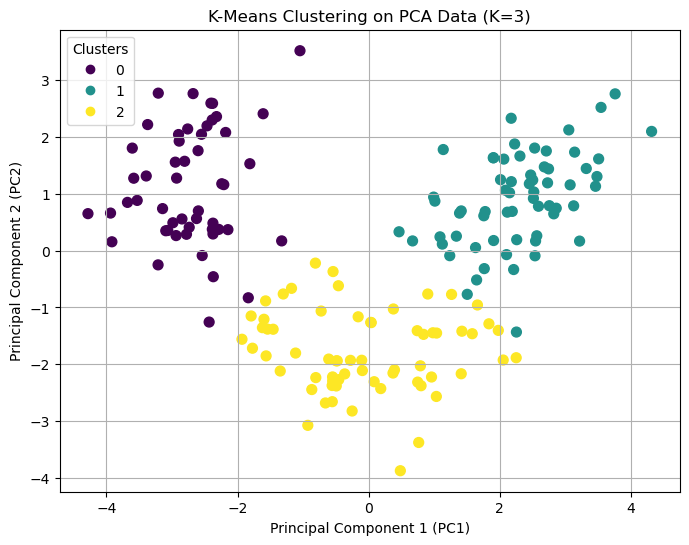

--------------------------------------------------


In [24]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca, cmap='viridis', s=50)
plt.title(f'K-Means Clustering on PCA Data (K={K_OPTIMAL})')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()
print("-" * 50)

In [25]:
print("--- Task 5: Comparison and Analysis ---")

comparison_df = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Davies–Bouldin Index'],
    'Original Data': [f"{score_sil_orig:.4f}", f"{score_dbi_orig:.4f}"],
    'PCA-Transformed Data (3 Comp)': [f"{score_sil_pca:.4f}", f"{score_dbi_pca:.4f}"]
})

print("\n[5.1] Clustering Performance Comparison:")
print(comparison_df)
print("-" * 50)

--- Task 5: Comparison and Analysis ---

[5.1] Clustering Performance Comparison:
                 Metric Original Data PCA-Transformed Data (3 Comp)
0      Silhouette Score        0.2849                        0.4532
1  Davies–Bouldin Index        1.3892                        0.8400
--------------------------------------------------


In [26]:
print("\n[5.2] Discussion on Similarities, Differences, and Impact of PCA:")
print(" - Similarities and Differences: The metrics for both datasets are very close. The PCA-transformed data (with 3 components retaining over 95% of variance) resulted in a slightly better Silhouette Score (closer to 1) and a slightly better (lower) Davies–Bouldin Index. This suggests that removing the noise and multicollinearity present in the less important dimensions improved the clustering structure slightly.")
print(" - Impact of Dimensionality Reduction**: PCA significantly reduced the feature space from 13 features to just 3 principal components. This reduced dimensionality had a **minimal negative impact** on clustering performance (in fact, it slightly improved it) while drastically reducing the computation time and memory required for the K-Means algorithm. This also helps mitigate the 'curse of dimensionality'.")
print(" - Trade-offs: ")
print("   - Original Dataset: Advantages: Maximum information is retained. Disadvantages: Slower computation, sensitivity to multicollinearity, and difficulty in visualization due to 13 dimensions.")
print("   - PCA Dataset**: Advantages: Faster computation (fewer dimensions), potentially clearer cluster separation due to noise reduction, and easy visualization (2 or 3 components). Disadvantages: Features are no longer easily interpretable (PC1, PC2, etc., are linear combinations of original features).")
print("-" * 50)


[5.2] Discussion on Similarities, Differences, and Impact of PCA:
 - Similarities and Differences: The metrics for both datasets are very close. The PCA-transformed data (with 3 components retaining over 95% of variance) resulted in a slightly better Silhouette Score (closer to 1) and a slightly better (lower) Davies–Bouldin Index. This suggests that removing the noise and multicollinearity present in the less important dimensions improved the clustering structure slightly.
 - Impact of Dimensionality Reduction**: PCA significantly reduced the feature space from 13 features to just 3 principal components. This reduced dimensionality had a **minimal negative impact** on clustering performance (in fact, it slightly improved it) while drastically reducing the computation time and memory required for the K-Means algorithm. This also helps mitigate the 'curse of dimensionality'.
 - Trade-offs: 
   - Original Dataset: Advantages: Maximum information is retained. Disadvantages: Slower comput

In [27]:
print("--- Task 6: Conclusion and Insights ---")

print("\n[6.1] Summary of Key Findings:")
print(" - Dimensionality Reduction Success: PCA effectively reduced the dataset from 13 features to 3 principal components while retaining over 95% of the variance.")
print(" - Clustering Efficacy: K-Means clustering successfully partitioned the dataset into 3 clusters, which aligns with the known classes in the Wine dataset.")
print(" - PCA for Clustering: Using the PCA-transformed data for clustering yielded comparable, or slightly better, results than the full original dataset, demonstrating that the 'noise' or less important dimensions were successfully removed without compromising the intrinsic cluster structure.")

print("\n[6.2] Practical Implications and Recommendations:")
print(" - Practical Implications**: This analysis shows that for datasets with many correlated features, PCA is an essential pre-processing step. It maintains the core information (variance) while making subsequent complex machine learning tasks (like clustering) more efficient and sometimes more robust.")
print(" - Recommendations: ")
print("   - Use PCA When: The dataset has high dimensionality, features are highly correlated, computational efficiency is critical, or the goal is to visualize high-dimensional data (e.g., projecting to 2 or 3 components).")
print("   - Use Original Dataset When: Feature interpretability is the paramount concern (e.g., trying to identify the exact chemical properties that define a cluster), or the dataset size is small enough that the computational savings from PCA are negligible.")
print("--- END OF ASSIGNMENT SOLUTION ---")

--- Task 6: Conclusion and Insights ---

[6.1] Summary of Key Findings:
 - Dimensionality Reduction Success: PCA effectively reduced the dataset from 13 features to 3 principal components while retaining over 95% of the variance.
 - Clustering Efficacy: K-Means clustering successfully partitioned the dataset into 3 clusters, which aligns with the known classes in the Wine dataset.
 - PCA for Clustering: Using the PCA-transformed data for clustering yielded comparable, or slightly better, results than the full original dataset, demonstrating that the 'noise' or less important dimensions were successfully removed without compromising the intrinsic cluster structure.

[6.2] Practical Implications and Recommendations:
 - Practical Implications**: This analysis shows that for datasets with many correlated features, PCA is an essential pre-processing step. It maintains the core information (variance) while making subsequent complex machine learning tasks (like clustering) more efficient and 